In [1]:
import numpy as np
from toy_datasets import * 
from BootstrappedNonparametrics.nonparametrics import *
import os
import math
import time
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import scipy.io as sio
from sklearn import mixture
from sklearn.neighbors import NearestNeighbors

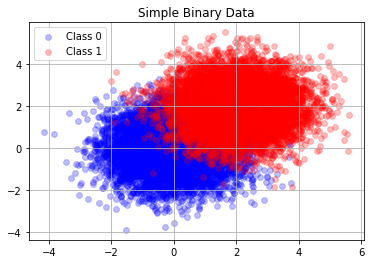

In [99]:
from sklearn.neighbors import KNeighborsClassifier
# from slkearn
x0, x1, labels = gen_simple_binary_data(N = 10000, mu_y = 2 * np.ones([1, 2]), ndims = 2)
xdata = np.vstack([x0, x1])
# print(labels.shape)
# print(xdata.shape)
# plt.figure()
# plt.plot(a[:, 0], a[:, 1], ')
plot_2d_dataset(xdata, labels, 'Simple Binary Data')

neigh = NearestNeighbors(n_neighbors=3)
neigh = neigh.fit(xdata)


In [100]:
# !pip install ml_insights
# !pip install betacal

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ml_insights as mli
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, brier_score_loss, roc_auc_score
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
from betacal import BetaCalibration
mli.__version__

'0.1.6'

In [107]:
train_pct = .75
calib_pct = .1
test_pct = 1 - train_pct - calib_pct 
rs = 42
xtraincal1, xte1, ytraincal1, yte1 = train_test_split(xdata, labels, test_size=test_pct, random_state = rs)
xtr1, xcal1, ytr1, ycal1 = train_test_split(xtraincal1, ytraincal1, test_size=calib_pct/(1 - test_pct), random_state = rs)
xtr1.shape, xcal1.shape, xte1.shape

((14999, 2), (2001, 2), (3000, 2))

In [108]:
clf = LogisticRegression(C=.01, solver='lbfgs')
clf.fit(xtr1, ytr1)

LogisticRegression(C=0.01)

In [109]:
preds = clf.predict(xcal1)
predprobas = clf.predict_proba(xcal1)
print('Train Acc:\t', clf.score(xtr1, ytr1))
print('Calibration Accuracy:\t', clf.score(xcal1, ycal1))
print('Test Acc:\t', clf.score(xte1, yte1))

Train Acc:	 0.9215947729848657
Calibration Accuracy:	 0.9250374812593704
Test Acc:	 0.916


In [110]:
from sklearn.metrics import log_loss, brier_score_loss, roc_auc_score
from sklearn.datasets import load_iris
# X, y = load_iris(return_x_y = True)

Text(0, 0.5, '$x_1$')

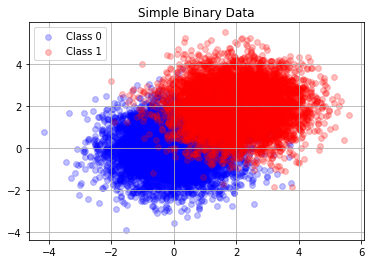

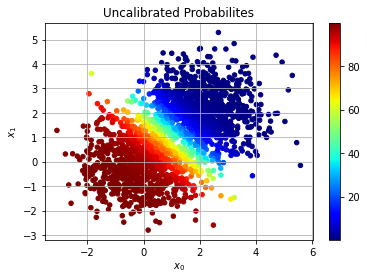

In [111]:
plot_2d_dataset(xtr1, ytr1, 'Simple Binary Data')
# plt.plot(xte1)

# pointwiseBER = np.array([r[0] for r in rslts])
# pointwisedp = np.array([r[1] for r in rslts])
uncalib_proba = predprobas[:, 0]
# uncalib_proba = np.max(predprobas, axis=1)
fig = plt.figure()
plt.scatter(xcal1[:, 0], xcal1[:, 1], c=uncalib_proba*100, s=20, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.title('Uncalibrated Probabilites')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')



In [1]:
rf1_preds_test_uncalib = predprobas[:, 1]
prob_true, prob_pred = calibration_curve(ycal1, rf1_preds_test_uncalib, n_bins=20)
plt.scatter(prob_pred, prob_true)
plt.plot(np.linspace(0,1,11),np.linspace(0,1,11), color='k')

NameError: name 'predprobas' is not defined

{'pred_probs': array([0.01668129, 0.07394506, 0.12337658, 0.17785888, 0.22075997,
        0.27311282, 0.32253875, 0.37226207, 0.42421118, 0.48171248,
        0.5216798 , 0.5793648 , 0.62453984, 0.67776377, 0.73020146,
        0.77974083, 0.82779213, 0.87639587, 0.92705621, 0.98468066]),
 'emp_probs': array([0.00492611, 0.04938272, 0.09375   , 0.11904762, 0.12903226,
        0.26923077, 0.27586207, 0.33333333, 0.32142857, 0.41176471,
        0.56521739, 0.60869565, 0.53571429, 0.68      , 0.90909091,
        0.725     , 0.90697674, 0.95238095, 0.95876289, 0.99465241]),
 'bin_counts': array([406.,  81.,  64.,  42.,  31.,  26.,  29.,  27.,  28.,  17.,  23.,
         23.,  28.,  25.,  33.,  40.,  43.,  63.,  97., 374.])}

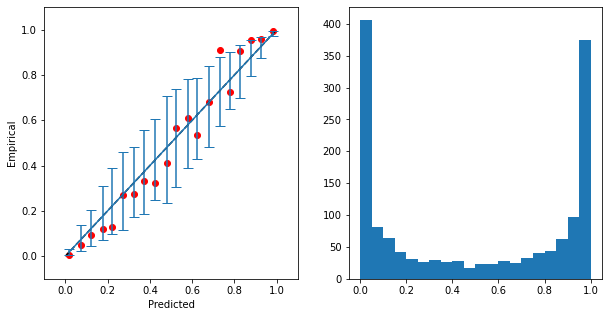

In [80]:
import ml_insights as mli
plt.figure(figsize=(10,5))
mli.plot_reliability_diagram(yte1, rf1_preds_test_uncalib, show_histogram=True)

In [ ]:
''' Spanning Tree Motivation Example '''


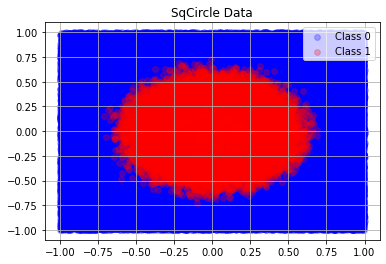

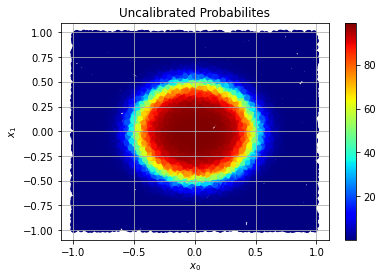

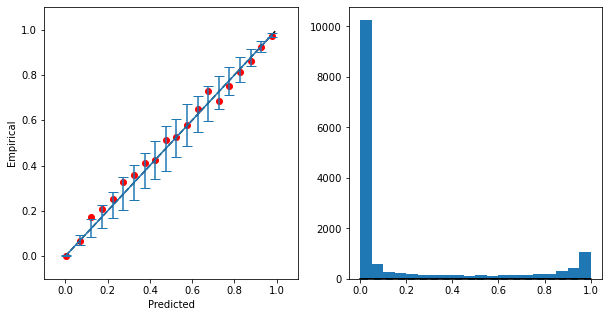

In [82]:
from sklearn.neighbors import KNeighborsClassifier
# from slkearn
x0square, x1circle, labels = inscribed_circle_dataset(N=99999, radius=.5, sidelen=2, sigma=.1)
xdata = np.vstack([x0square, x1circle])
# labels = ysqcirc

xdata = np.vstack([x0square, x1circle])
xtraincal1, xte1, ytraincal1, yte1 = train_test_split(xdata, labels, test_size=test_pct, random_state = rs)
xtr1, xcal1, ytr1, ycal1 = train_test_split(xtraincal1, ytraincal1, test_size=calib_pct/(1 - test_pct), random_state = rs)
plot_2d_dataset(xdata, labels, 'SqCircle Data')

import numpy as np
from sklearn.svm import SVC
clf = SVC(gamma='auto', probability=True)
clf.fit(xtr1, ytr1)
preds = clf.predict(xte1)
predprobas = clf.predict_proba(xte1)
# uncalib_proba = np.max(predprobas, axis=1)
uncalib_proba = predprobas[:, 1]

fig = plt.figure()
plt.scatter(xte1[:, 0], xte1[:, 1], c=uncalib_proba*100, s=20, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.title('Uncalibrated Probabilites')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')

plt.figure(figsize=(10,5))
rf1_preds_test_uncalib = predprobas[:, 1]
mli.plot_reliability_diagram(yte1, rf1_preds_test_uncalib, show_histogram=True)
plt.scatter(prob_pred, prob_true)
plt.plot(np.linspace(0,1,11),np.linspace(0,1,11), color='k')